<a href="https://colab.research.google.com/github/priyansh7453/Exploratory-Data-Analysis-And-Feature-Engineering/blob/main/Titanic_Dataset_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('titanic.csv')

In [3]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_data.rename(columns={'deck':'cabin'},inplace = True)

In [5]:
titanic_data.info()
print(titanic_data.shape)
print(titanic_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  cabin        203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'w

In [6]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [8]:
#drop the cabic columns
# titanic_data.drop('cabin',axis = 1,inplace = True)
titanic_data.drop('embark_town',axis=1,inplace=True)

In [9]:
#fill the age null columns
titanic_data['age'].fillna(titanic_data['age'].mean())

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [10]:
titanic_data['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [11]:
titanic_data['embarked'].fillna(titanic_data['embarked']== 'S',inplace=True)



<ipython-input-11-517706699>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embarked'].fillna(titanic_data['embarked']== 'S',inplace=True)


In [12]:
# Now the astype('int') will work as the NaN values are filled
titanic_data['survived']=titanic_data['survived'].astype('category')
titanic_data['pclass']=titanic_data['pclass'].astype('category')
titanic_data['sex']=titanic_data['sex'].astype('category')
titanic_data['embarked']=titanic_data['embarked'].astype('category')
titanic_data['age']=titanic_data['age'].astype('int')


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    category
 1   pclass      891 non-null    category
 2   sex         891 non-null    category
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    category
 8   class       891 non-null    object  
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  cabin       203 non-null    object  
 12  alive       891 non-null    object  
 13  alone       891 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(2), object(4)
memory usage: 61.6+ KB


# Univariate Analysis

Out of 891 62 people died in the accident


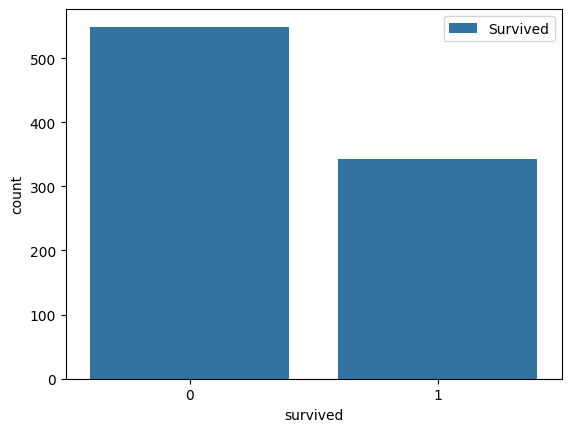

In [14]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(x='survived', data=titanic_data, label='Survived')

death_percent=round((titanic_data['survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='pclass', ylabel='count'>

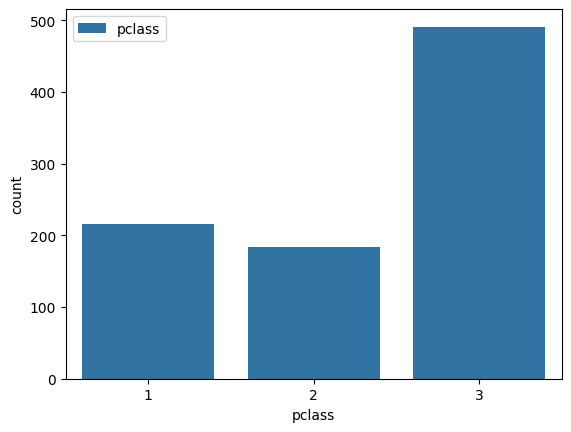

In [15]:
# Pclass column

print((titanic_data['pclass'].value_counts()/891)*100)

sns.countplot(x='pclass', data=titanic_data, label='pclass')


sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='sex', ylabel='count'>

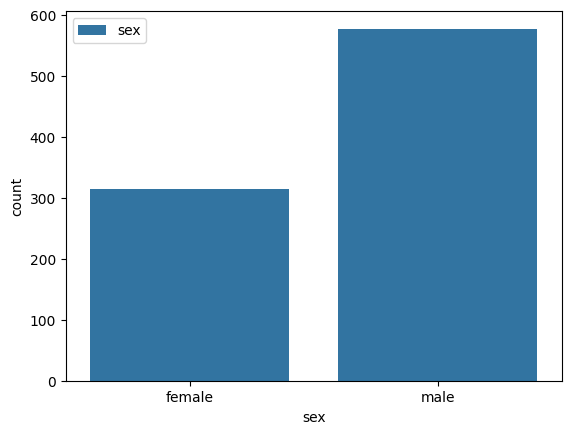

In [16]:
print((titanic_data['sex'].value_counts()/891)*100)

sns.countplot(x = 'sex', data = titanic_data, label = 'sex')

sibsp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: xlabel='sibsp', ylabel='count'>

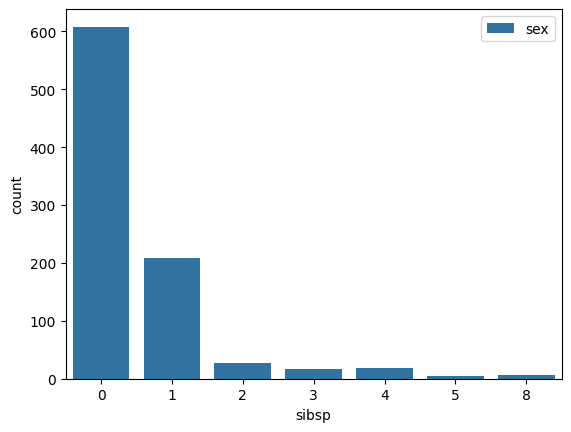

In [17]:
print((titanic_data['sibsp'].value_counts()/891)*100)

sns.countplot(x = 'sibsp', data = titanic_data, label = 'sex')

embarked
S        72.278339
C        18.855219
Q         8.641975
False     0.224467
Name: count, dtype: float64


<Axes: xlabel='embarked', ylabel='count'>

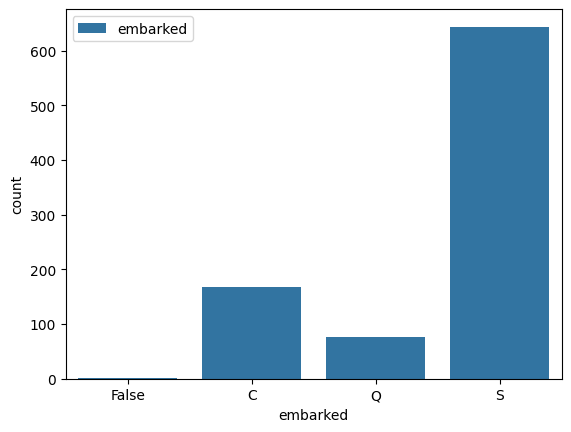

In [18]:
print((titanic_data['embarked'].value_counts()/891)*100)

sns.countplot(x = 'embarked', data = titanic_data, label = 'embarked')

<Axes: ylabel='age'>

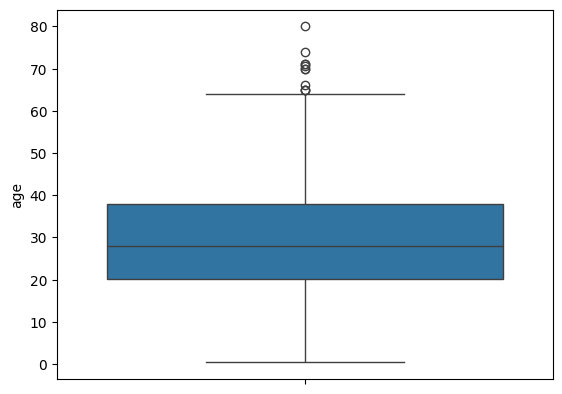

In [19]:
sns.boxplot(titanic_data['age'])

In [20]:
# Just out of curiosity

print("People with age in between 60 and 70 are",titanic_data[(titanic_data['age']>60) & (titanic_data['age']<70)].shape[0])
print("People with age greater than 70 and 75 are",titanic_data[(titanic_data['age']>=70) & (titanic_data['age']<=75)].shape[0])
print("People with age greater than 75 are",titanic_data[titanic_data['age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",titanic_data[titanic_data['age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


<Axes: ylabel='fare'>

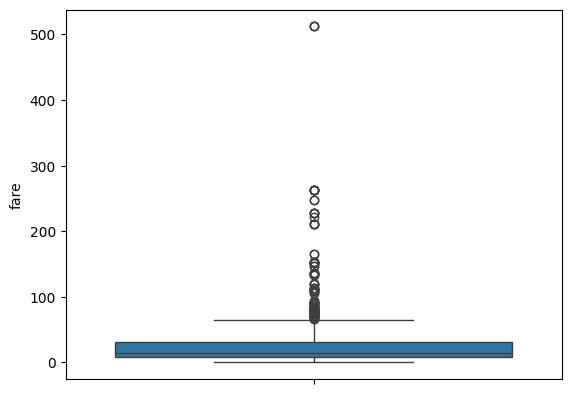

In [21]:
sns.boxplot(titanic_data['fare'])

In [22]:
print("People with fare in between $200 and $300",titanic_data[(titanic_data['fare']>200) & (titanic_data['fare']<300)].shape[0])
print("People with fare in greater than $300",titanic_data[titanic_data['fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


## Multivariate Analysis

survived,0,1
pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


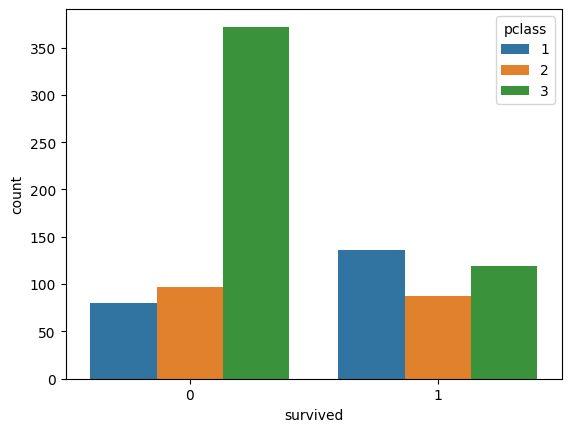

In [23]:
# Survival with Pclass

sns.countplot(x= 'survived' ,hue = 'pclass', data = titanic_data)

pd.crosstab(titanic_data['pclass'], titanic_data['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

survived,0,1
sex,,
female,25.8,74.2
male,81.1,18.9


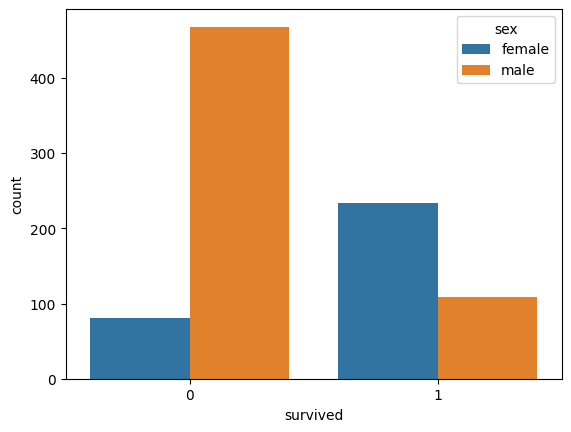

In [24]:
# Survival with sex

sns.countplot(x= 'survived' ,hue = 'sex', data = titanic_data)

pd.crosstab(titanic_data['sex'], titanic_data['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

survived,0,1
embarked,,
False,0.0,100.0
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7


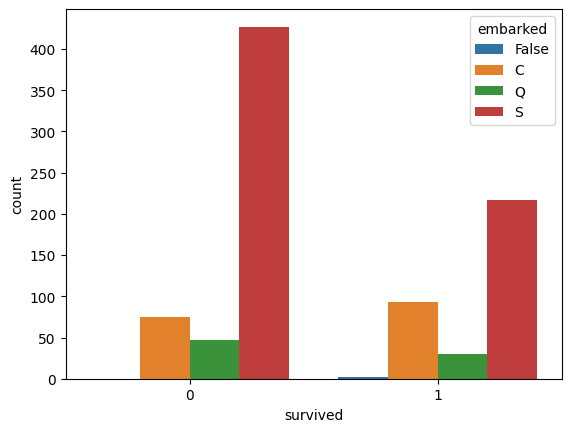

In [25]:
# Survival with embarked

sns.countplot(x= 'survived' ,hue = 'embarked', data = titanic_data)

pd.crosstab(titanic_data['embarked'], titanic_data['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

<ipython-input-26-647747943>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data[titanic_data['survived']==0]['age'])
<ipython-input-26-647747943>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data[titanic_data['survived']==1]['age'])


<Axes: xlabel='age', ylabel='Density'>

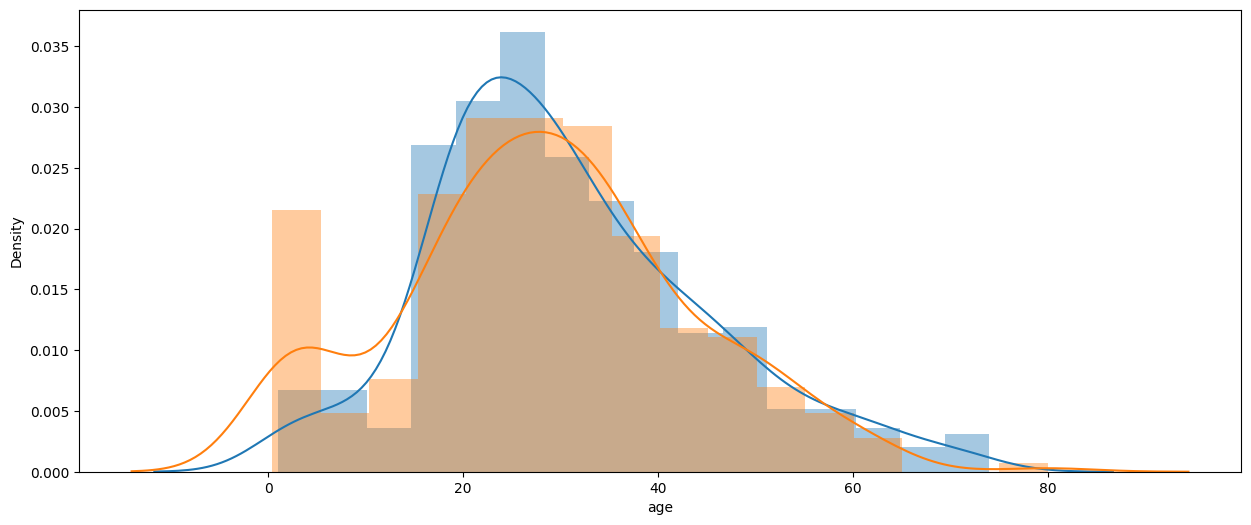

In [26]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(titanic_data[titanic_data['survived']==0]['age'])
sns.distplot(titanic_data[titanic_data['survived']==1]['age'])

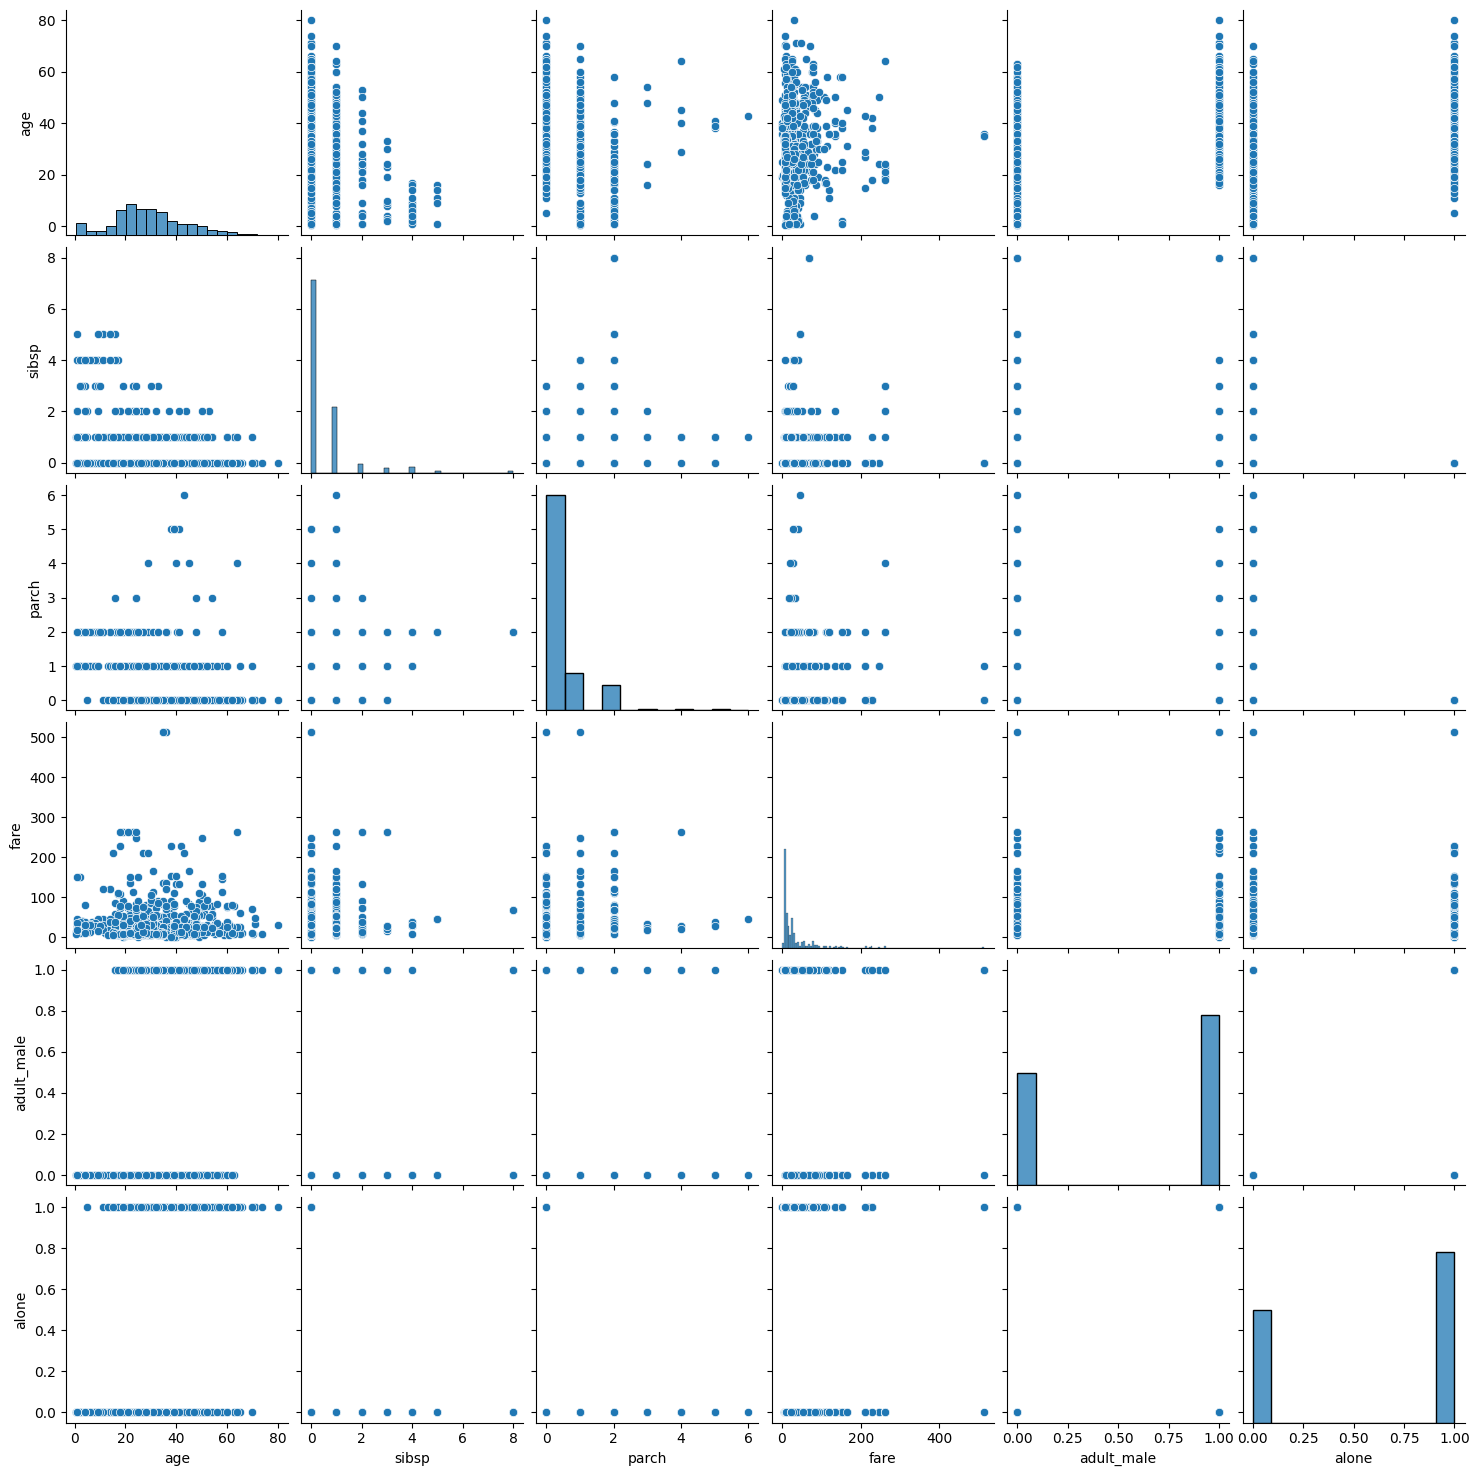

In [27]:
sns.pairplot(titanic_data)

In [28]:
# Select only numeric columns
numeric_df = titanic_data.select_dtypes(include=['number'])

<Axes: >

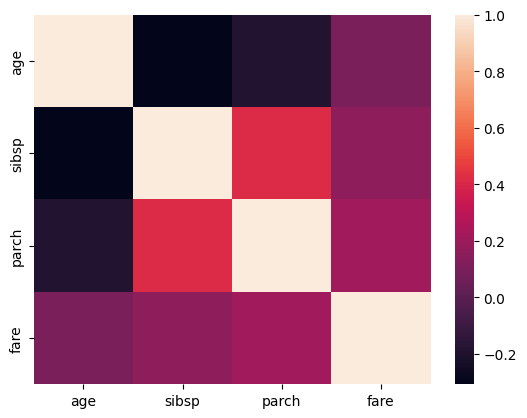

In [29]:
sns.heatmap(numeric_df.corr())

In [30]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

titanic_data['family_size']=titanic_data['parch'] + titanic_data['sibsp']

In [31]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [32]:
titanic_data['family_type']=titanic_data['family_size'].apply(family_type)

In [33]:
titanic_data.drop(['sibsp','parch','family_size'],axis=1,inplace=True)

#Detecting outliers

In [34]:
# handling outliers in age(Almost normal)
titanic_data=titanic_data[titanic_data['age']<(titanic_data['age'].mean() + 3 * titanic_data['age'].std())]
titanic_data.shape

(712, 13)

In [35]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(titanic_data['fare'],25)
Q3= np.percentile(titanic_data['fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

titanic_data=titanic_data[(titanic_data['fare']>outlier_low) & (titanic_data['fare']<outlier_high)]

In [36]:
titanic_data

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,cabin,alive,alone,family_type
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,no,False,Medium
1,1,1,female,38.0,71.2833,C,First,woman,False,C,yes,False,Medium
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,yes,True,Alone
3,1,1,female,35.0,53.1000,S,First,woman,False,C,yes,False,Medium
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,no,True,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q,Third,woman,False,NaN,no,False,Large
886,0,2,male,27.0,13.0000,S,Second,man,True,NaN,no,True,Alone
887,1,1,female,19.0,30.0000,S,First,woman,False,B,yes,True,Alone
889,1,1,male,26.0,30.0000,C,First,man,True,C,yes,True,Alone


In [43]:
# One hot encoding

titanic_data.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

# pd.get_dummies(data=titanic_data, columns=['pclass','sex','embarked','family_type'], drop_first=True)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,cabin,alive,alone,family_type
872,0,1,male,33.0,5.0000,S,First,man,True,B,no,True,Alone
688,0,3,male,18.0,7.7958,S,Third,man,True,NaN,no,True,Alone
41,0,2,female,27.0,21.0000,S,Second,woman,False,NaN,no,False,Medium
606,0,3,male,30.0,7.8958,S,Third,man,True,NaN,no,True,Alone


In [44]:
pd.get_dummies(data=titanic_data, columns=['pclass','sex','embarked','family_type'], drop_first=True)

,survived,age,fare,class,who,adult_male,cabin,alive,alone,pclass_2,pclass_3,sex_male,embarked_C,embarked_Q,embarked_S,family_type_Large,family_type_Medium
0,0,22.0,7.2500,Third,man,True,NaN,no,False,False,True,True,False,False,True,False,True
1,1,38.0,71.2833,First,woman,False,C,yes,False,False,False,False,True,False,False,False,True
2,1,26.0,7.9250,Third,woman,False,NaN,yes,True,False,True,False,False,False,True,False,False
3,1,35.0,53.1000,First,woman,False,C,yes,False,False,False,False,False,False,True,False,True
4,0,35.0,8.0500,Third,man,True,NaN,no,True,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,29.1250,Third,woman,False,NaN,no,False,False,True,False,False,True,False,True,False
886,0,27.0,13.0000,Second,man,True,NaN,no,True,True,False,True,False,False,True,False,False
887,1,19.0,30.0000,First,woman,False,B,yes,True,False,False,False,False,False,True,False,False
889,1,26.0,30.0000,First,man,True,C,yes,True,False,False,True,True,False,False,False,False


In [49]:
# One hot encoding

titanic_data.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

# pd.get_dummies(data=titanic_data, columns=['pclass','sex','embarked','family_type'], drop_first=True)


# Assign the result of get_dummies back to the DataFrame
titanic_data = pd.get_dummies(data=titanic_data, columns=['pclass','sex','embarked','family_type'], drop_first=True)

# Now the columns should exist and you can convert their type
titanic_data[['pclass_2', 'pclass_3', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'family_type_Large', 'family_type_Medium']] = titanic_data[['pclass_2', 'pclass_3', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'family_type_Large', 'family_type_Medium']].astype(int)

<Axes: >

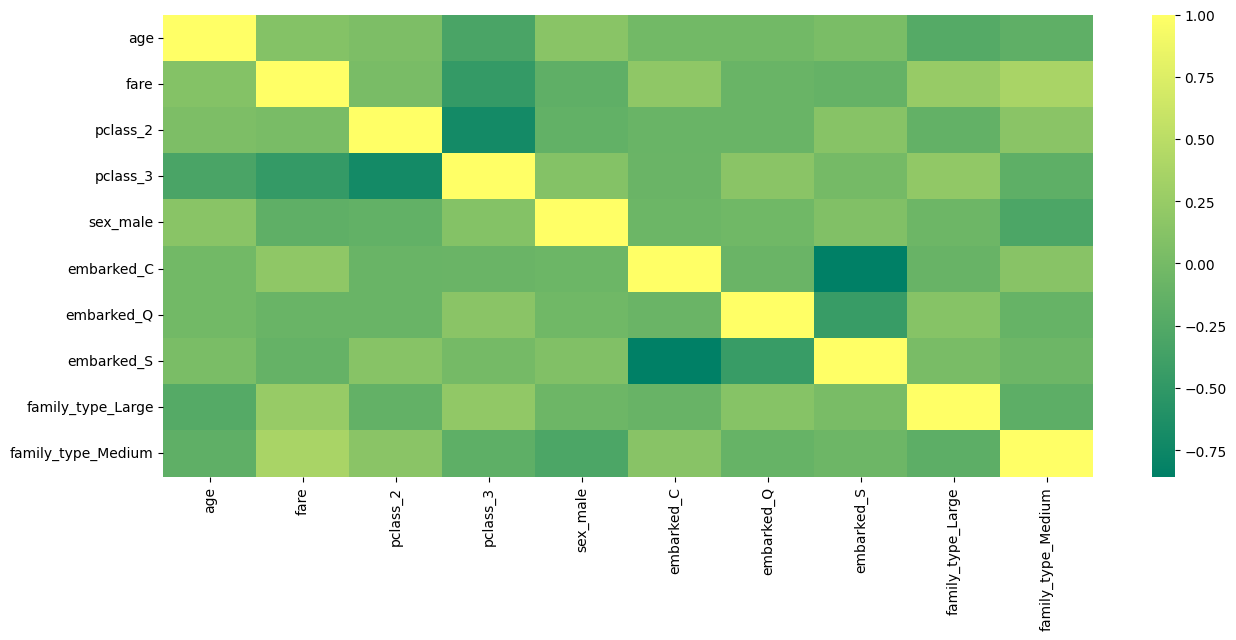

In [53]:
# Select only numeric columns
numeric_df = titanic_data.select_dtypes(include=['number'])
plt.figure(figsize=(15,6))
sns.heatmap(numeric_df.corr(), cmap='summer')